# 0.Игра в имитацию
    выполнил Сергей Харитонов ПВ-32

# Задание
Дискретная случайная величина ξ принимает значения 0, 1, 2 и 3 с вероятностями соответствующими данным варианта. Используя генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Проверить на уровне значимости 0,05 соответствие полученных данных распределению ξ, используя критерий сравнения долей. Вероятности: р0=i/2*(i+j+k), р1=(j+k)/2*(i+j+k), р2=(i+k)/2*(i+j+k), р3=j/2*(i+j+k). Значения i, j, k являются последними тремя цифрами зачетки. Если какая-то из этих трех цифр равна 0, то вместо 0 берется 10.

In [1]:
# Последние 3 цифры зачетки
i = 1
j = 6
k = 3

In [2]:
# Вероятности
p_list = [
    i/(2*(i+j+k)),
    (j+k)/(2*(i+j+k)),
    (i+k)/(2*(i+j+k)),
    j/(2*(i+j+k))
]
print("Вероятности")
for i, p in enumerate(p_list):
    print(f"P{i} = {p}")

Вероятности
P0 = 0.05
P1 = 0.45
P2 = 0.2
P3 = 0.3


In [3]:
# класс описывающий Дискретную Случайную Величину
from random import random
class DRV:
    def __init__(self, p_list):
        self.p_list = p_list
        self.split_segment = self.get_split_segment(p_list)
    

    #     получаем границы интервалов на отрезке
    @staticmethod
    def get_split_segment(p_list):
        split_segment = p_list.copy()
        for i in range(len(split_segment)-1):
            split_segment[i+1] += split_segment[i]
        return split_segment

    #     получаем значение ДСВ
    def get_drv_value(self):
        random_value = random()
        segment = 0
        
        while random_value >= self.split_segment[segment]:
            segment += 1
            
        return segment

In [4]:
# формирование выборки
drv = DRV(p_list)
n = 100000
generated_p_values = [drv.get_drv_value() for _ in range(n)]
print("Ваша выборка")
print(generated_p_values)

Ваша выборка
[1, 3, 2, 3, 1, 1, 2, 3, 0, 1, 1, 3, 3, 3, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 2, 1, 3, 2, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 2, 1, 0, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 2, 2, 1, 0, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 3, 3, 2, 2, 3, 1, 2, 1, 1, 1, 1, 2, 3, 2, 3, 2, 1, 2, 1, 3, 2, 3, 2, 1, 1, 1, 1, 3, 0, 3, 3, 2, 2, 2, 3, 1, 2, 3, 3, 1, 1, 0, 3, 3, 1, 1, 2, 1, 3, 3, 2, 1, 3, 2, 1, 1, 1, 1, 3, 1, 2, 3, 2, 3, 2, 1, 1, 3, 0, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 3, 2, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 0, 3, 1, 0, 3, 3, 3, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 0, 2, 2, 2, 1, 1, 2, 1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 0, 1, 1, 1, 1, 3, 3, 2, 3, 3, 3, 1, 3, 1, 1, 2, 1, 2, 3, 1, 2, 3, 3, 1, 3, 3, 2, 3, 0, 3, 1, 2, 1, 1, 3, 1, 1, 1, 3, 3, 3, 0, 3, 3, 1, 1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 3, 2, 3, 2, 1, 1, 3, 1,

In [5]:
# получение теоретических частот
p = [current_p*n for current_p in p_list]
print("Теоретические частоты")
print(p)

Теоретические частоты
[5000.0, 45000.0, 20000.0, 30000.0]


In [6]:
# получение наблюдаемых частот
generated_p = [generated_p_values.count(p) for p in range(len(p_list))]
print("Наблюдаемые частоты")
print(generated_p)

Наблюдаемые частоты
[4989, 45024, 19940, 30047]


In [7]:
# Проверка соответствия полученной выборки заданному распределению 
# на уровне значимости 0,05
from scipy.stats import chisquare
from math import sqrt
K, P = chisquare(generated_p, p)
print(f"Xi^2 K={K}, p={P}\n")

print("Сравнение долей")
for p_index in range(len(p)):
    gen_p  = generated_p[p_index] / n
    teor_p = p[p_index] / n
    print(f"Вероятность из полученной выборки {gen_p}\n"
           f"Теоретическая вероятность {teor_p}")
    print(f"K для P{i} = {abs((gen_p - teor_p) / (sqrt(gen_p * (1-gen_p) / n)))}\n")

Xi^2 K=0.2906333333333333, p=0.9617803631849919

Сравнение долей
Вероятность из полученной выборки 0.04989
Теоретическая вероятность 0.05
K для P3 = 0.15977138083721065

Вероятность из полученной выборки 0.45024
Теоретическая вероятность 0.45
K для P3 = 0.15254663600805207

Вероятность из полученной выборки 0.1994
Теоретическая вероятность 0.2
K для P3 = 0.474876721021537

Вероятность из полученной выборки 0.30047
Теоретическая вероятность 0.3
K для P3 = 0.32418590399831754



Как мы можем видеть гипотезы согласуются

Выборка


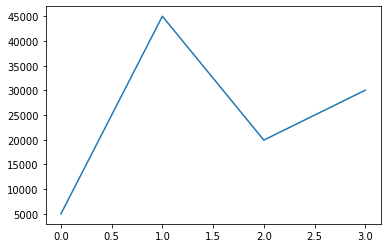

Заданное распределение


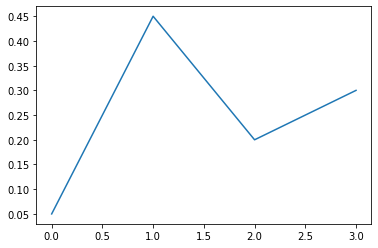

In [8]:
from matplotlib import pyplot as plt
print("Выборка")
plt.plot(generated_p)
plt.show()

print("Заданное распределение")
plt.plot(p_list)
plt.show()